In [1]:
%config Completer.use_jedi=False
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import gc
from pathlib import Path
import torch.nn as nn
from data import *
import random
import kornia

In [14]:
DATA = Path('sample_levin_dataset')

## Image resize issue with kornia

In [15]:
im = Image.open(str(DATA/'train/blur/im1.png'))

In [19]:
tuple(reversed(im.size))

(255, 255)

In [6]:
tfm = kornia.Resize((255,255), 'bicubic')

In [ ]:
tfm()

In [10]:
tfm(torch.randn(3,1,255,255))

tensor([[[[ 1.6531,  0.0721, -1.5221,  ..., -0.1730,  0.1098, -0.0907],
          [ 0.7183, -0.2899,  0.2538,  ..., -0.5599, -0.6420,  0.6357],
          [ 2.1780,  1.6597,  0.4244,  ...,  1.4773,  0.0643, -0.3862],
          ...,
          [ 0.6824, -2.3449, -0.5470,  ...,  0.8145,  0.6424, -0.5255],
          [-0.9804,  1.4424, -0.1924,  ...,  1.0173, -0.9031,  0.9678],
          [-0.9869,  0.5642,  0.0147,  ..., -0.4359,  1.5280,  0.2045]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.000

In [12]:
list(reversed((1,2,3)))

[3, 2, 1]

## Random

In [7]:
a = [1,2,3]

[autoreload of data failed: Traceback (most recent call last):
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueErro

In [10]:
a.extend([4,5])

In [5]:
torch.randn(5).clamp(0, 1)

tensor([1.0000, 0.0000, 0.5668, 0.0000, 0.0000])

In [7]:
a = list([])
for i in a:
    print(5)

In [6]:
list(zip([1,2,3,4],[7,78,9,0]))

[autoreload of data failed: Traceback (most recent call last):
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/akash/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueErro

[(1, 7), (2, 78), (3, 9), (4, 0)]

In [9]:
a = np.asarray(Image.open(DATA/'train'/'blur'/'im1.png'))

In [11]:
a.dtype

dtype('uint8')

## Making a proper DL model

In [21]:
class EDSRResBlock(nn.Module):
    def __init__(self, channels, ks=3, stride=1, padding=1):
        super(EDSRResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=channels, out_channels=channels, 
                          kernel_size=ks, stride=stride, padding=padding)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=channels, out_channels=channels, 
                          kernel_size=ks, stride=stride, padding=padding)
        
    def forward(self, x):
        return self.conv2(self.relu1(self.conv1(x))) + x

In [22]:
class SimpleCNNModel(nn.Module):
    def __init__(self, in_ch=3, num_edsr_blocks=1):
        super(SimpleCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=in_ch, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        
        self.edsr_blocks = nn.Sequential()
        for i in range(num_edsr_blocks):
            self.edsr_blocks.add_module(f'edsr_{i+1}', EDSRResBlock(16))
        
        self.conv_final = nn.Conv2d(16, in_ch, kernel_size=3, stride=1, padding=1)
        
    def forward(self, x):
        x = self.relu1(self.conv1(x))
        x = self.edsr_blocks(x)
        return self.conv_final(x)

In [28]:
m = SimpleCNNModel();
print(m)
print(m(torch.randn(1,3,100,100)).shape)

SimpleCNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (edsr_blocks): Sequential(
    (edsr_1): EDSRResBlock(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (relu1): ReLU()
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (conv_final): Conv2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
torch.Size([1, 3, 100, 100])


In [15]:
class SampleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.m = nn.Parameter(torch.tensor(1.0))
    
    def forward(self, x):
        return self.m * x

In [19]:
m = SampleModel()
x = torch.randn(3, 100, 100)
assert torch.all(m(x) == x)

## Random seed context manager

In [21]:
print(torch.randint(0, 10, (5,)))

with torch.random.fork_rng():
    for i in range(3):
        torch.manual_seed(42)
        print(torch.randint(0, 10, (5,)))
    
print(torch.randint(0, 10, (5,)))

tensor([3, 0, 5, 8, 0])
tensor([2, 7, 6, 4, 6])
tensor([2, 7, 6, 4, 6])
tensor([2, 7, 6, 4, 6])
tensor([9, 5, 2, 9, 3])


## Data Module Stuff

In [4]:
m = DeblurDataModule(DATA, batch_size=4)

Calculating dataset stats with a 50% random subset of training data


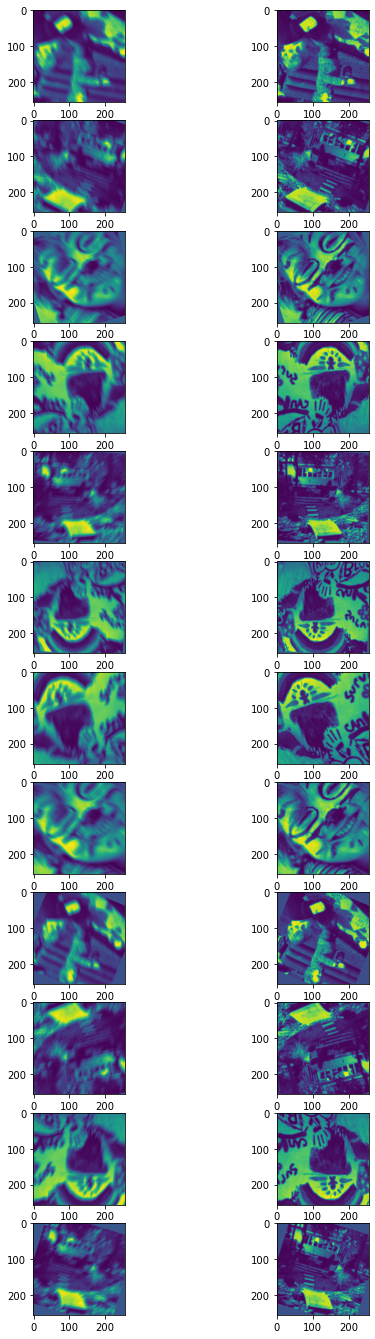

In [5]:
fig = m.show_batch(3)

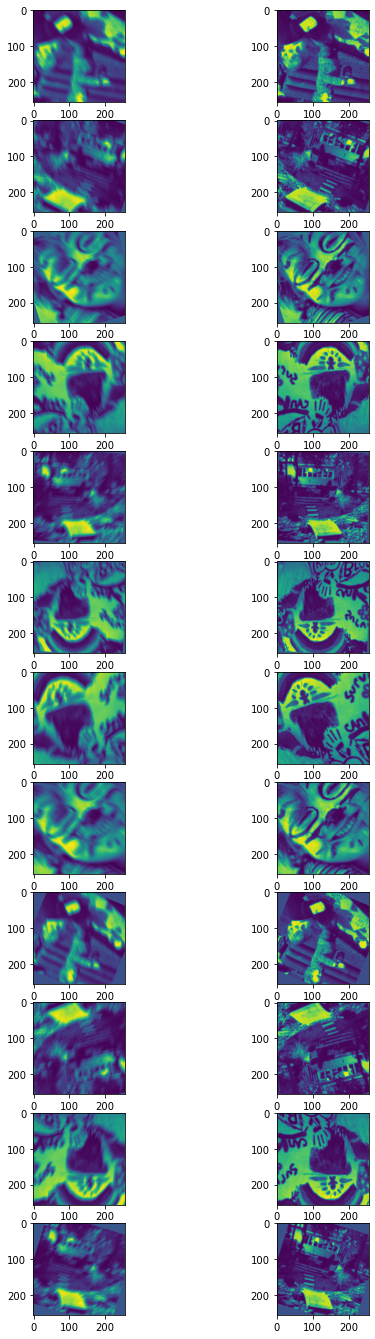

In [6]:
fig